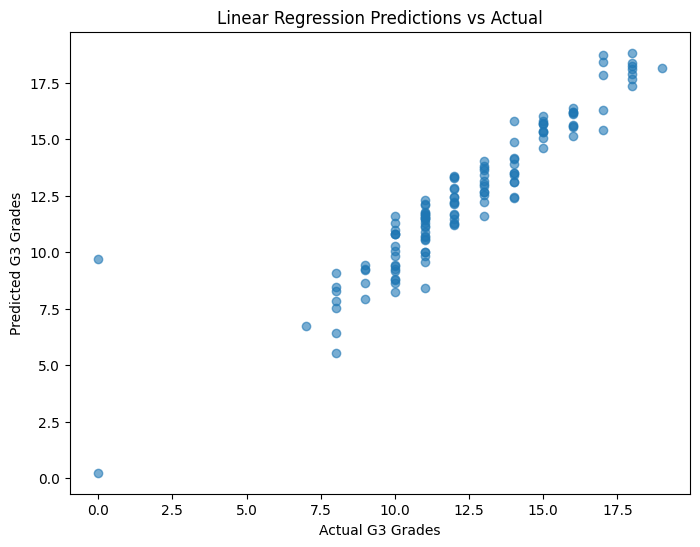

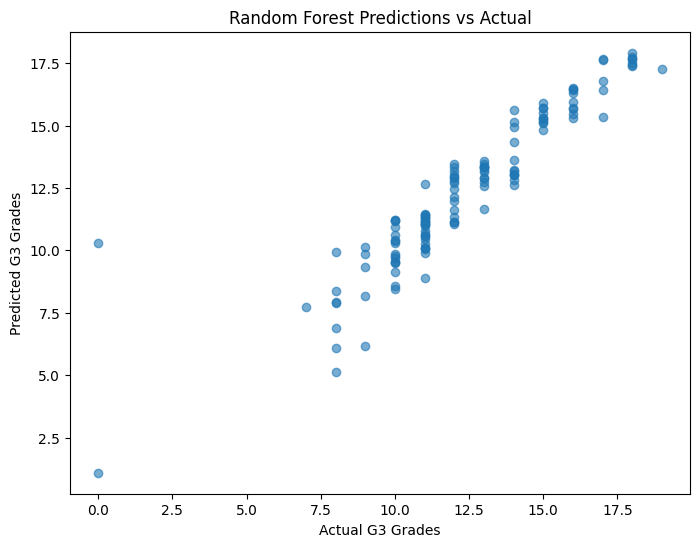

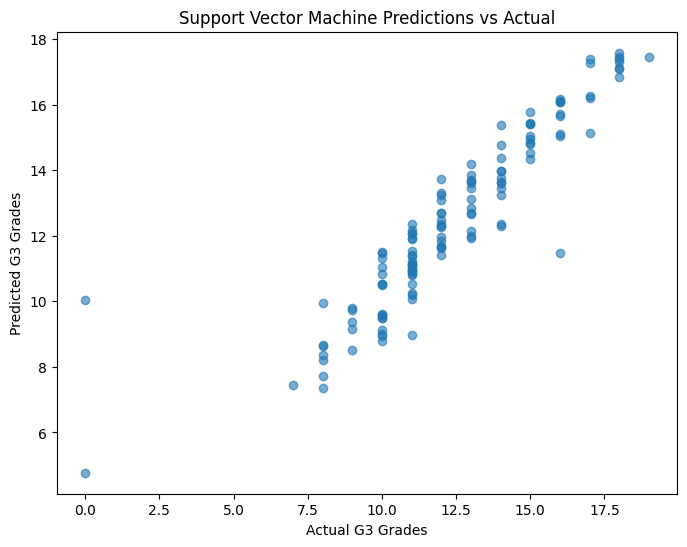

Linear Regression: MSE = 1.44, R2 Score = 0.85
Random Forest: MSE = 1.55, R2 Score = 0.84
Support Vector Machine: MSE = 1.70, R2 Score = 0.83


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset

data = pd.read_csv('student.csv')

# Display the first few rows
data.head()

# Preprocess the data
# Encode categorical features
label_encoders = {}
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop(columns=['G3'])  # Drop the target variable
y = data['G3']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R2 Score': r2}

    # Plot predictions vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel('Actual G3 Grades')
    plt.ylabel('Predicted G3 Grades')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.show()

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")


In [5]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("student.csv")

# Encode categorical features
categorical_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
    'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic'
]

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['G3'])  # Drop the target variable
y = data['G3']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Train and evaluate models
results = {}
predictions = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R2 Score': r2}

    # Store predictions
    predictions[model_name] = [{'actual': actual, 'predicted': pred} for actual, pred in zip(y_test.tolist(), y_pred.tolist())]

# Export results to JSON files
with open("model_results.json", "w") as f:
    json.dump(results, f)

with open("predictions.json", "w") as f:
    json.dump(predictions, f)

print("Exported model_results.json and predictions.json successfully!")


Exported model_results.json and predictions.json successfully!


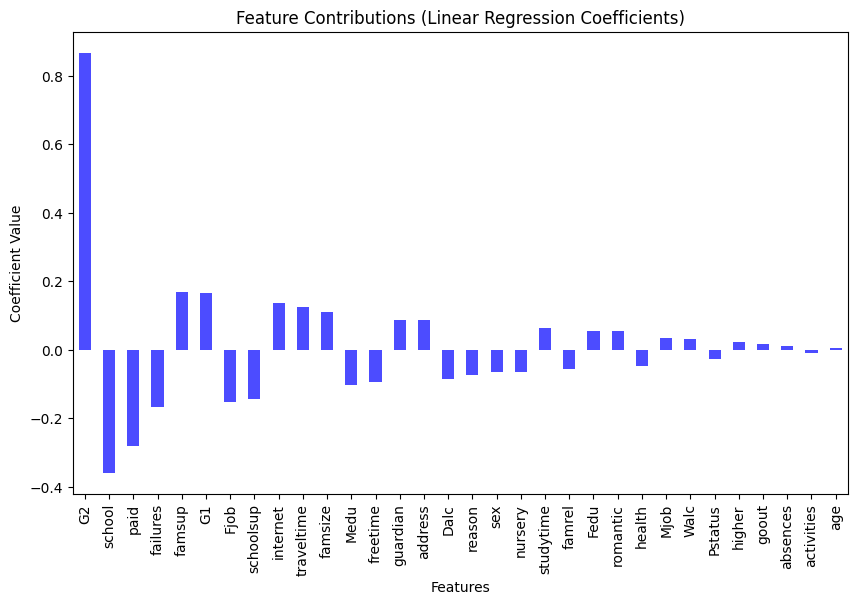

In [7]:
# Feature Importance: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_coefficients = pd.Series(
    linear_model.coef_, index=X.columns
).sort_values(key=abs, ascending=False)

# Plot Linear Regression Coefficients
plt.figure(figsize=(10, 6))
linear_coefficients.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Feature Contributions (Linear Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

In [11]:
import os
import json

# Ensure the 'assets' directory exists
os.makedirs("assets", exist_ok=True)

# Export feature importance (Linear Regression coefficients) to JSON
feature_importance = [
    {"feature": feature, "coefficient": coefficient}
    for feature, coefficient in linear_coefficients.items()
]

# Save the JSON file
with open("assets/feature_importance.json", "w") as json_file:
    json.dump(feature_importance, json_file, indent=4)

print("Feature importance saved to 'assets/feature_importance.json'")


Feature importance saved to 'assets/feature_importance.json'
